## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

## Read the Data from the CSV

In [2]:
dummy_df = pd.read_csv("bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [3]:
# way to segregate numerical and categorical columns
dummy_df_num_col = dummy_df.select_dtypes(include = 'number')
dummy_df_cat_col = dummy_df.select_dtypes(include = 'object')

In [4]:
print(dummy_df_num_col.columns)
print(dummy_df_cat_col.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [5]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [6]:
contact_df = dummy_df

In [7]:
# better way to encode categorical data into numbers -  
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    for i in dummy_df_cat_col.columns:
        res_df[i] = le.fit_transform(res_df[i])
    
    return res_df

In [8]:
# print(preprocessor(contact_df))
encoded_df = preprocessor(contact_df)
x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values # target values

In [9]:
x

array([[ 59,   0,   1, ...,  -1,   0,   3],
       [ 56,   0,   1, ...,  -1,   0,   3],
       [ 41,   9,   1, ...,  -1,   0,   3],
       ...,
       [ 32,   9,   2, ...,  -1,   0,   3],
       [ 43,   9,   1, ..., 172,   5,   0],
       [ 34,   9,   1, ...,  -1,   0,   3]], dtype=int64)

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
# longer version-
# def preprocessor(df):
#     res_df = df.copy()
#     le = preprocessing.LabelEncoder()
    
#     res_df['job'] = le.fit_transform(res_df['job'])
#     res_df['marital'] = le.fit_transform(res_df['marital'])
#     res_df['education'] = le.fit_transform(res_df['education'])
#     res_df['default'] = le.fit_transform(res_df['default'])
#     res_df['housing'] = le.fit_transform(res_df['housing'])
#     res_df['month'] = le.fit_transform(res_df['month'])
#     res_df['loan'] = le.fit_transform(res_df['loan'])
#     res_df['contact'] = le.fit_transform(res_df['contact'])
#     res_df['day_of_week'] = le.fit_transform(res_df['day'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
#     res_df['deposit'] = le.fit_transform(res_df['deposit'])
#     return res_df

In [ ]:
# other way of standardization-
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  

## Split the data into Train-Test

In [12]:
# y values are target values-
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [13]:
x_train

array([[ 31,   7,   2, ...,  -1,   0,   3],
       [ 40,   0,   1, ..., 369,   1,   0],
       [ 46,   4,   1, ...,  -1,   0,   3],
       ...,
       [ 43,   1,   1, ...,  -1,   0,   3],
       [ 44,   1,   2, ...,  -1,   0,   3],
       [ 54,  10,   0, ..., 105,   3,   2]], dtype=int64)

In [14]:
x_test

array([[ 34,   9,   2, ...,  -1,   0,   3],
       [ 27,   4,   2, ..., 185,   1,   2],
       [ 78,   5,   0, ...,  -1,   0,   3],
       ...,
       [ 55,   5,   1, ...,  -1,   0,   3],
       [ 36,   1,   2, ..., 347,   1,   0],
       [ 38,   0,   0, ...,  -1,   0,   3]], dtype=int64)

In [15]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [16]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

## Build the Decision Tree Model

In [17]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7240452458282003
Testing score:  0.7174205105239588


In [18]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.7919139881285698
Testing score:  0.7859381997313032


In [19]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8,min_samples_split=80,min_samples_leaf=10, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8357038862134617
Testing score:  0.8069861173309449


In [20]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy") # criterion = "entropy"or"gain"
model_dt.fit(x_train, y_train)
# y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
y_pred = model_dt.predict(x_test)

In [21]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8110165696372593


## Performance Metrics

### Precision 

In [24]:
# precision is defined as ratio of actual positive from predicted positives.(out of all predicted true, which are actually true)
# means how good is our model in predicting 1 as 1 .
# precision is calculated from predicted data.(look from predicted side)
# precision = (TP) / (TP+FP)
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.787


## Recall

In [ ]:
#Recall
# y_actual_result = y_actual_result.flatten()
# count = 0
# for result in y_actual_result:
#      if(result == 1):
#         count=count+1

# print ("true yes|predicted yes:")
# print (count/float(len(y_actual_result)))

In [25]:
# recall score represents the model’s ability to correctly predict the positives out of actual positives
# it measures how good our machine learning model is at identifying all actual positives out of all positives
# that exist within a dataset.
# recall is calculated from actual data.(look from actual side)
# Recall Score = TP / (FN + TP)
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.831


In [ ]:
#  If we want to minimize false negatives, we would choose a model with high precision. 
#  Conversely, if we want to minimize false positives, we would choose a model with high recall

## Area Under the Curve

In [26]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [27]:
predictions = model_dt.predict(x_test)
predictions

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
# for i in range(len(predictions)):
#     if(predictions[i] == 1):
#         y_actual_result = np.vstack(( predictions,y_test[i]))

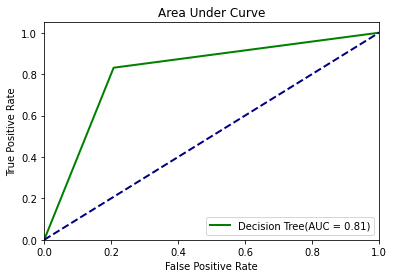

In [31]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',lw =lw,
         label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy',lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [32]:
print (confusion_matrix(y_test, predictions))

[[921 241]
 [181 890]]


In [33]:
accuracy_score(y_test, predictions)

0.8110165696372593

In [34]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

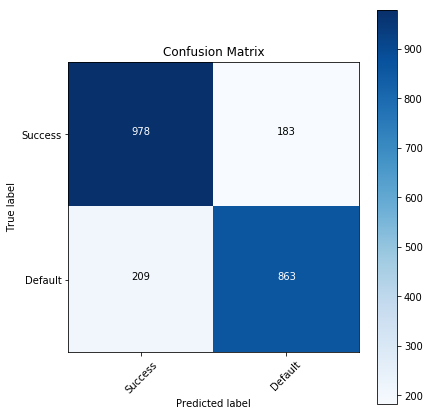

In [79]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()